# Sentiment Analysis of Tweets: Beyond Burger

## Goals:
## Part I: Visualize positive and negative tweets in word clouds¶
## Part II: Use positive and negative tweets to train logistic regression machine learning model to predict positive/negative sentiments of more tweets

### Import libraries

In [1]:
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Part I

### Read in training set of tweets

In [2]:
train = pd.read_csv('final_beyond_text_training_tweets.csv')

In [3]:
train

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound,sentiment_label
0,https://twitter.com/libraryjogirl/status/14357...,2021-09-08 23:57:23,@AWCanada Hi A&amp;W! I'm seeing commercials f...,1435754169965613057,1,0,0,en,0.000,0.912,0.088,0.4738,0
1,https://twitter.com/eliseelara/status/14357513...,2021-09-08 23:46:04,their supreme sauce?!? THEIR SEASONED FRIES?!?...,1435751320439361543,0,0,0,en,0.097,0.723,0.180,0.5615,0
2,https://twitter.com/t_kelly15/status/143574800...,2021-09-08 23:32:53,Someone accidentally sent their A&amp;W dinner...,1435748002925326336,1,0,5,en,0.130,0.870,0.000,-0.5859,1
3,https://twitter.com/marlenemdiaz08/status/1435...,2021-09-08 23:24:47,Like beyond nasty for a fast food joint. No ke...,1435745963189014532,0,0,0,en,0.242,0.690,0.067,-0.9083,1
4,https://twitter.com/divinaxo/status/1425869375...,2021-08-12 17:18:45,Beyond burger 😋😋😋 https://t.co/eiqlclnsnQ,1425869375941267463,0,1,1,en,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,https://twitter.com/_HiZel_/status/13277190531...,2020-11-14 21:04:24,Tell me why I called a Beyond burger an Infini...,1327719053171933184,0,0,7,en,0.000,1.000,0.000,0.0000,0
29996,https://twitter.com/400lez/status/132771789520...,2020-11-14 20:59:48,feel like absolute garbage. just want a beyond...,1327717895208460288,0,0,5,en,0.000,0.648,0.352,0.4215,0
29997,https://twitter.com/njroute22/status/132771443...,2020-11-14 20:46:03,More Reasons to Avoid Beyond Meat Fake Food ht...,1327714432378695683,0,0,0,en,0.218,0.782,0.000,-0.8865,1
29998,https://twitter.com/aviosAdventurer/status/132...,2020-11-14 20:40:46,@GazRich88 I’m trying to get my hands on some ...,1327713105720336385,1,0,1,en,0.000,0.870,0.130,0.6369,0


In [4]:
train_original=train.copy()

### Read in tweets for test set

In [5]:
test = pd.read_csv('beyond_text_training_tweets.csv', skiprows=range(1, 30001))

In [6]:
test

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang
0,https://twitter.com/PathanShekib/status/132770...,2020-11-14 20:01:34,@aneelfassa beyond meat burgers are diff,1327703240729796609,0,0,0,en
1,https://twitter.com/galwaybae/status/132770305...,2020-11-14 20:00:50,dennys plant based burgers a close second to b...,1327703053777199106,0,0,0,en
2,https://twitter.com/TheHeroes_HERO/status/1327...,2020-11-14 19:32:53,Who ever said Beyond Meat tastes like meat FUC...,1327696020923420673,0,0,2,en
3,https://twitter.com/cherrymorello/status/13276...,2020-11-14 19:09:58,@feebee79 I’ve just had a beyond burger with f...,1327690255366053888,0,0,2,en
4,https://twitter.com/downlowbambi/status/132768...,2020-11-14 19:05:29,@themetdtd Yeah it’s great that all I have to ...,1327689125328158720,1,0,0,en
...,...,...,...,...,...,...,...,...
9994,https://twitter.com/Intofurler/status/12956694...,2020-08-18 10:30:42,@O0Rocker0O they started selling the beyond bu...,1295669444891615233,1,0,0,en
9995,https://twitter.com/TravelOceans/status/129566...,2020-08-18 10:24:45,"Reduce your meat consumption, start by cutting...",1295667947550253056,0,0,0,en
9996,https://twitter.com/TNarinen/status/1295646808...,2020-08-18 09:00:45,@mattimolari Tässähän tämä homma kärjistettynä...,1295646808992096256,0,0,0,fi
9997,https://twitter.com/surf_panda/status/12956346...,2020-08-18 08:12:20,@niksy @NebojsaG @polojaci @josephbt @borisrad...,1295634621636509696,0,0,2,und


In [7]:
test_original=test.copy()

### Save test set of tweets (to be used in part II)

In [8]:
test_original.to_csv('beyond_test_tweets.csv', index=False)

### Combine training set and test set

In [9]:
combine = train.append(test,ignore_index=True)

In [10]:
combine

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound,sentiment_label
0,https://twitter.com/libraryjogirl/status/14357...,2021-09-08 23:57:23,@AWCanada Hi A&amp;W! I'm seeing commercials f...,1435754169965613057,1,0,0,en,0.000,0.912,0.088,0.4738,0.0
1,https://twitter.com/eliseelara/status/14357513...,2021-09-08 23:46:04,their supreme sauce?!? THEIR SEASONED FRIES?!?...,1435751320439361543,0,0,0,en,0.097,0.723,0.180,0.5615,0.0
2,https://twitter.com/t_kelly15/status/143574800...,2021-09-08 23:32:53,Someone accidentally sent their A&amp;W dinner...,1435748002925326336,1,0,5,en,0.130,0.870,0.000,-0.5859,1.0
3,https://twitter.com/marlenemdiaz08/status/1435...,2021-09-08 23:24:47,Like beyond nasty for a fast food joint. No ke...,1435745963189014532,0,0,0,en,0.242,0.690,0.067,-0.9083,1.0
4,https://twitter.com/divinaxo/status/1425869375...,2021-08-12 17:18:45,Beyond burger 😋😋😋 https://t.co/eiqlclnsnQ,1425869375941267463,0,1,1,en,0.000,1.000,0.000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,https://twitter.com/Intofurler/status/12956694...,2020-08-18 10:30:42,@O0Rocker0O they started selling the beyond bu...,1295669444891615233,1,0,0,en,NaN,NaN,NaN,NaN,NaN
39995,https://twitter.com/TravelOceans/status/129566...,2020-08-18 10:24:45,"Reduce your meat consumption, start by cutting...",1295667947550253056,0,0,0,en,NaN,NaN,NaN,NaN,NaN
39996,https://twitter.com/TNarinen/status/1295646808...,2020-08-18 09:00:45,@mattimolari Tässähän tämä homma kärjistettynä...,1295646808992096256,0,0,0,fi,NaN,NaN,NaN,NaN,NaN
39997,https://twitter.com/surf_panda/status/12956346...,2020-08-18 08:12:20,@niksy @NebojsaG @polojaci @josephbt @borisrad...,1295634621636509696,0,0,2,und,NaN,NaN,NaN,NaN,NaN


### Remove Twitter handles

In [11]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [12]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

### Remove punctuation, numbers, special characters

In [13]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-13-cd036dace8e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


### Remove short words

In [14]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

### Tokenize tweets

In [15]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

### Stem tweets

In [16]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [17]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

### Recombine tokens

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [19]:
combine['Tidy_Tweets'] = tokenized_tweet

### Tidy Tweets

In [20]:
combine

,url,date_and_time,tweet,tweet_id,reply_count,retweet_count,like_count,lang,negative,neutral,positive,compound,sentiment_label,Tidy_Tweets
0,https://twitter.com/libraryjogirl/status/14357...,2021-09-08 23:57:23,@AWCanada Hi A&amp;W! I'm seeing commercials f...,1435754169965613057,1,0,0,en,0.000,0.912,0.088,0.4738,0.0,see commerci your beyond meat burger vegetaria...
1,https://twitter.com/eliseelara/status/14357513...,2021-09-08 23:46:04,their supreme sauce?!? THEIR SEASONED FRIES?!?...,1435751320439361543,0,0,0,en,0.097,0.723,0.180,0.5615,0.0,their suprem sauc their season fri their beyon...
2,https://twitter.com/t_kelly15/status/143574800...,2021-09-08 23:32:53,Someone accidentally sent their A&amp;W dinner...,1435748002925326336,1,0,5,en,0.130,0.870,0.000,-0.5859,1.0,someon accident sent their dinner apart will u...
3,https://twitter.com/marlenemdiaz08/status/1435...,2021-09-08 23:24:47,Like beyond nasty for a fast food joint. No ke...,1435745963189014532,0,0,0,en,0.242,0.690,0.067,-0.9083,1.0,like beyond nasti fast food joint ketchup smas...
4,https://twitter.com/divinaxo/status/1425869375...,2021-08-12 17:18:45,Beyond burger 😋😋😋 https://t.co/eiqlclnsnQ,1425869375941267463,0,1,1,en,0.000,1.000,0.000,0.0000,0.0,beyond burger http eiqlclnsnq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,https://twitter.com/Intofurler/status/12956694...,2020-08-18 10:30:42,@O0Rocker0O they started selling the beyond bu...,1295669444891615233,1,0,0,en,NaN,NaN,NaN,NaN,NaN,they start sell beyond burger supermarket migh...
39995,https://twitter.com/TravelOceans/status/129566...,2020-08-18 10:24:45,"Reduce your meat consumption, start by cutting...",1295667947550253056,0,0,0,en,NaN,NaN,NaN,NaN,NaN,reduc your meat consumpt start cut beef then s...
39996,https://twitter.com/TNarinen/status/1295646808...,2020-08-18 09:00:45,@mattimolari Tässähän tämä homma kärjistettynä...,1295646808992096256,0,0,0,fi,NaN,NaN,NaN,NaN,NaN,homma rjistettyn miksei siell esim beyond burg...
39997,https://twitter.com/surf_panda/status/12956346...,2020-08-18 08:12:20,@niksy @NebojsaG @polojaci @josephbt @borisrad...,1295634621636509696,0,0,2,und,NaN,NaN,NaN,NaN,NaN,beyond burger lar sven


In [21]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [22]:
stopwords = ['imposs burger', 'imposs', 'burger', 'beyond', 'beyond burger', 'http', 'thi', 'carn', 'that', 'hamburguesa', 'impossibleburg', 'tri', 'they']

### Create word cloud of tweets with positive compound sentiment

In [23]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']>0])

In [24]:
wc_positive = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_positive)

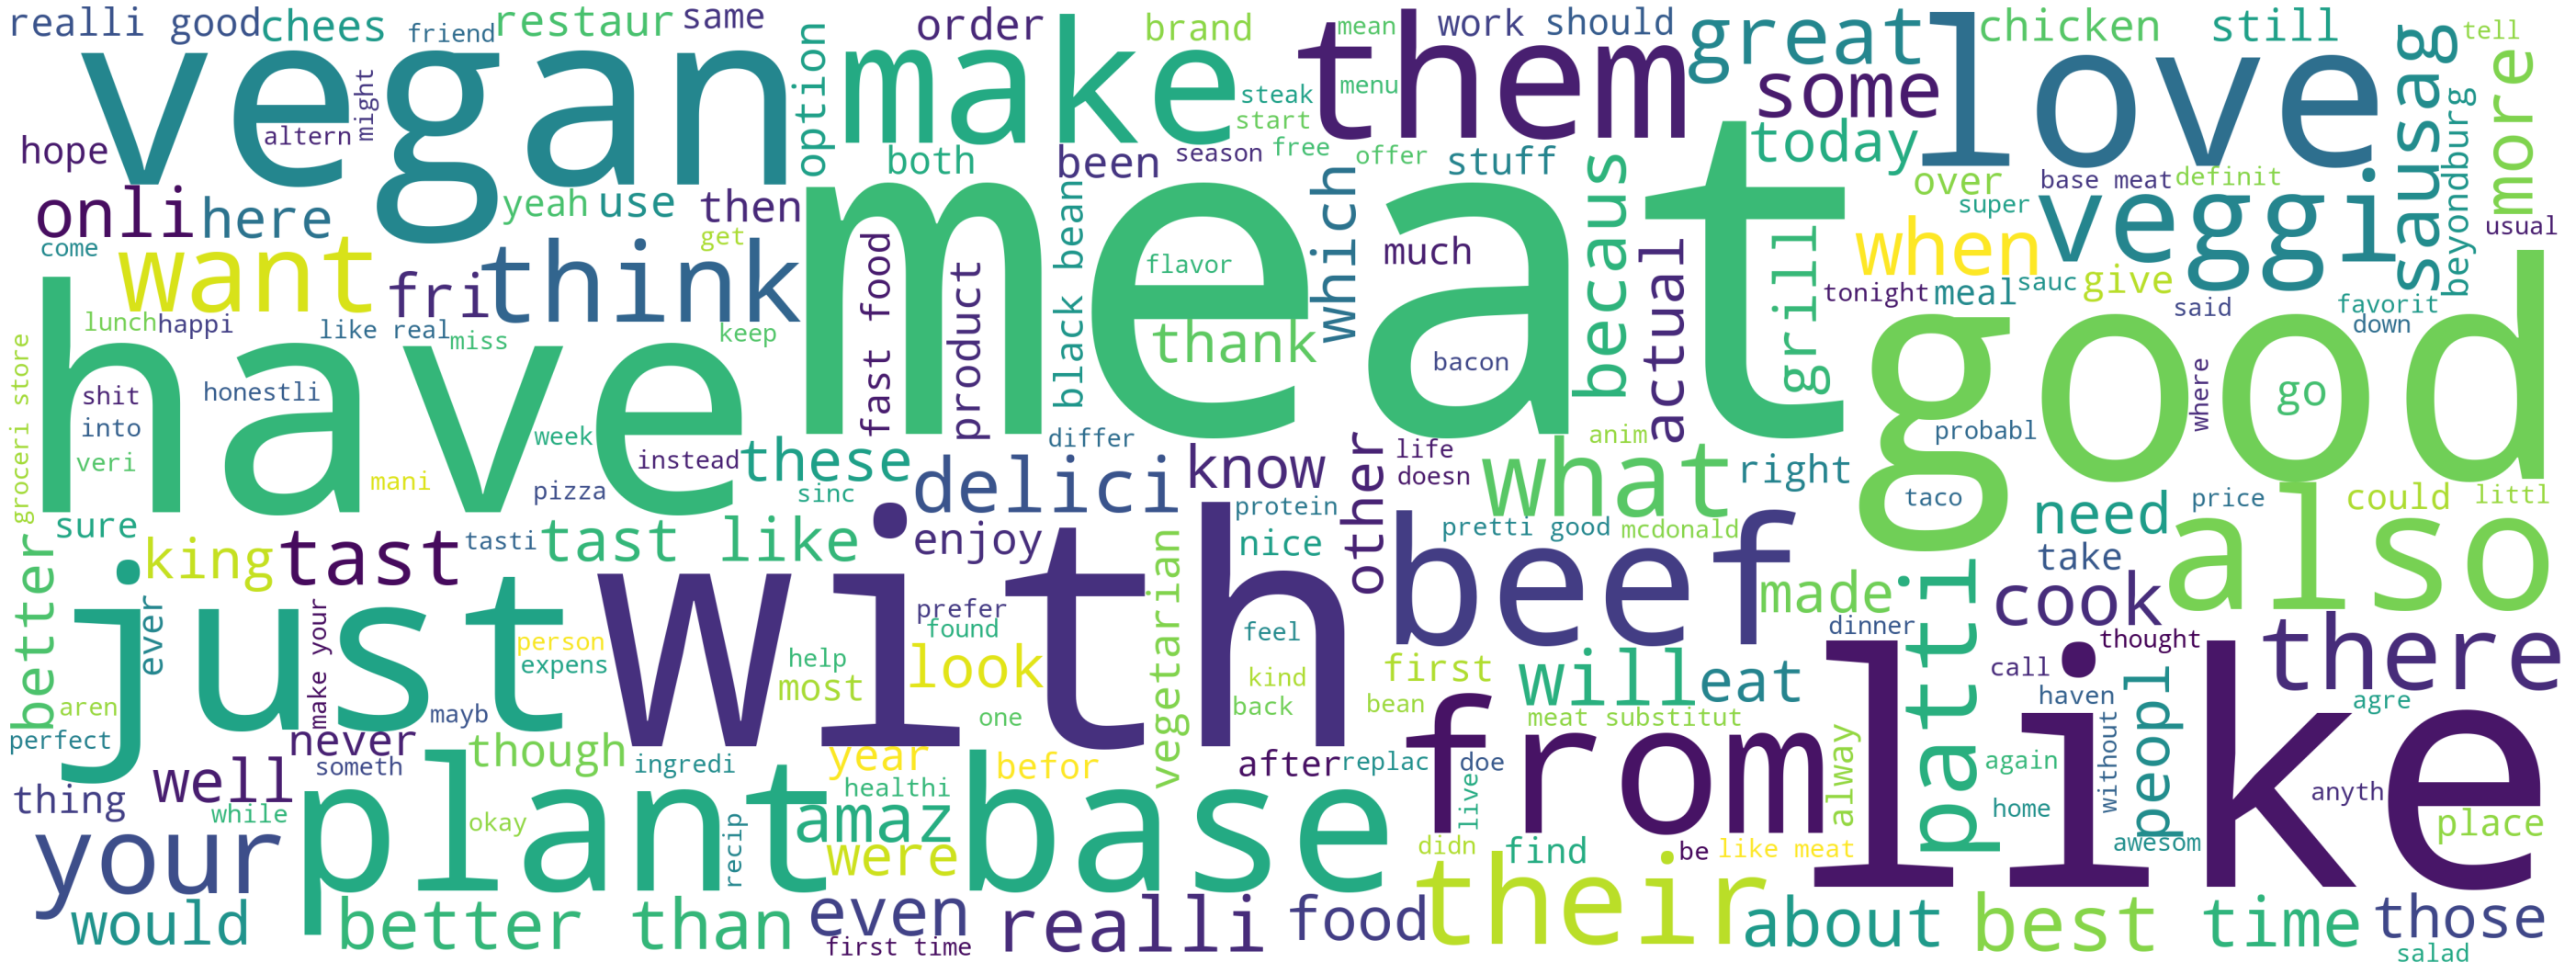

In [25]:
plt.figure(figsize=(50,50))
plt.imshow(wc_positive)
plt.axis('off')
plt.show()

In [26]:
wc_positive.to_file('beyond_wc_positive.png')

### Create word cloud of tweets with negative compound sentiment

In [27]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']<0])

In [28]:
wc_negative = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_negative)

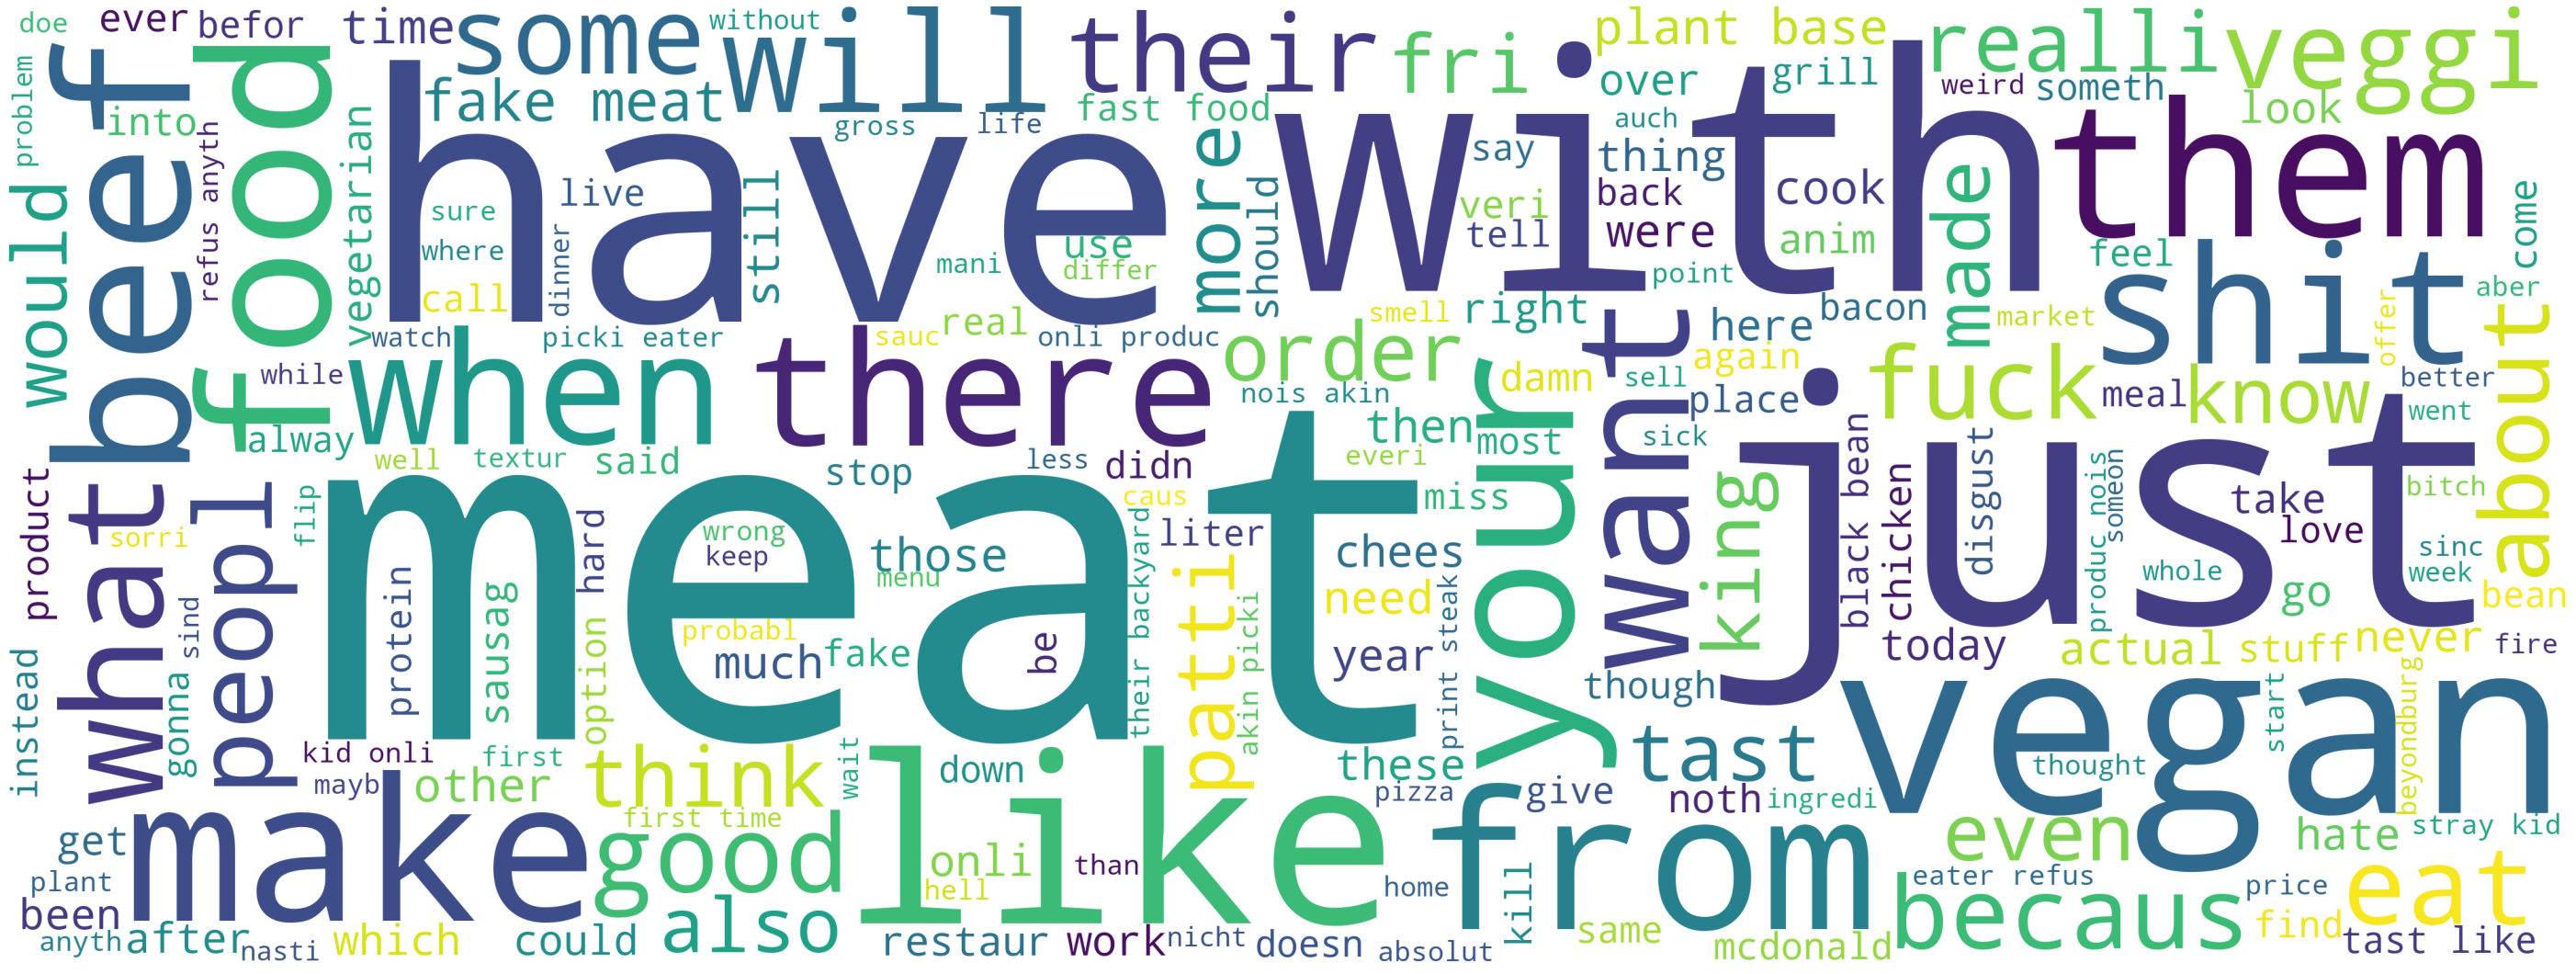

In [29]:
plt.figure(figsize=(50,50))
plt.imshow(wc_negative)
plt.axis('off')
plt.show()

In [30]:
wc_negative.to_file('beyond_wc_negative.png')

In [31]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

### Extract hashtags from tweets with positive compound sentiment

In [32]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']>0])

In [33]:
ht_positive

[[],
 [],
 [],
 [],
 [],
 ['moobyspopup'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['comfortfood'],
 ['fundrais', 'dine', 'nonprofit'],
 [],
 [],
 ['onthisdateinhiphop', 'odog', 'larenzt'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['portlandburgerweek'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['meatless', 'burger', 'notanad'],
 [],
 [],
 [],
 [],
 ['vegan'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['burger', 'sausag', 'plantbas', 'healthyfood', 'vegan'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['dentistemaxwithgulf'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 

In [34]:
ht_positive_unnest = sum(ht_positive,[])

In [35]:
ht_positive_unnest

['moobyspopup',
 'comfortfood',
 'fundrais',
 'dine',
 'nonprofit',
 'onthisdateinhiphop',
 'odog',
 'larenzt',
 'portlandburgerweek',
 'meatless',
 'burger',
 'notanad',
 'vegan',
 'burger',
 'sausag',
 'plantbas',
 'healthyfood',
 'vegan',
 'dentistemaxwithgulf',
 'vegan',
 'growtheshow',
 'beyond',
 'onestormynight',
 'nightsin',
 'wintersheat',
 'beyondsalem',
 'planet',
 'burgerstobeatm',
 'burgerstobeatm',
 'burgerstobeatm',
 'burgerstobeatm',
 'twobitesdeep',
 'burgerstobeatm',
 'straykid',
 'noeasi',
 'straykid',
 'noeasi',
 'thunder',
 'youmakestraykidsstay',
 'straykid',
 'straykid',
 'happyhour',
 'friend',
 'breakingnew',
 'wouldhitthat',
 'veganpow',
 'emiss',
 'pennystock',
 'pennyworth',
 'stockstobuy',
 'stocksinfocu',
 'climat',
 'vegan',
 'impossibleburg',
 'mcpizza',
 'plantbasedfood',
 'beyondmeat',
 'buyonegiveon',
 'beyondburg',
 'foodi',
 'cmn',
 'pantherpr',
 'beyondburg',
 'plantbas',
 'vegan',
 'vegetarian',
 'beyondburg',
 'vegan',
 'vegan',
 'plantpow',
 'cr

### Extract hashtags from tweets with negative compound sentiment

In [36]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']<0])

In [37]:
ht_negative

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ufo', 'tictac', 'uap', 'alien'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['leburgerweek'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['beyondburg', 'plantbas', 'yeahright'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ripoffbritain'],
 [],
 [],
 ['essen'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['porlosanimal',
  'porel

In [38]:
ht_negative_unnest = sum(ht_negative,[])

In [39]:
ht_negative_unnest

['ufo',
 'tictac',
 'uap',
 'alien',
 'leburgerweek',
 'beyondburg',
 'plantbas',
 'yeahright',
 'ripoffbritain',
 'essen',
 'porlosanimal',
 'porelplaneta',
 'portusalud',
 'vegan',
 'vegano',
 'plantbas',
 'beyondburg',
 'beyondmeat',
 'followyourheart',
 'tofutti',
 'straykid',
 'foodtrend',
 'plantbas',
 'foodtrend',
 'plantbas',
 'plantbasedfood',
 'burgerfreitag',
 'mtg',
 'nothank',
 'nothappen',
 'meersoja',
 'beyondburg',
 'beyondburg',
 'couldafooledh',
 'ong',
 'king',
 'petek',
 'beatm',
 'mcplant',
 'beyondburg',
 'beyondburg',
 'chinesefood',
 'momslif',
 'plasticworld',
 'lemongrov',
 'spotifi',
 'aktien',
 'bratwurst',
 'vegan',
 'kassel',
 'beyondburg',
 'care',
 'bitcoin',
 'ethereum',
 'altcoin',
 'btc',
 'vegan',
 'hupf',
 'animalright',
 'tri',
 'plantbas',
 'tri',
 'vegan',
 'bethechang',
 'endanimalexploit',
 'endanimalabus',
 'meat',
 'tax',
 'anim',
 'water',
 'land',
 'energi',
 'plantbas',
 'beyondburg',
 'dogsoftwittt',
 'imposs',
 'beyond',
 'eattherich',
 

### Frequency of hashtags from tweets with positive compound sentiment

In [40]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [41]:
word_freq_positive

FreqDist({'vegan': 315, 'beyondburg': 234, 'plantbas': 108, 'veganiseyourmenu': 107, 'beyondmeat': 82, 'burger': 75, 'vegetarian': 56, 'food': 37, 'beyond': 36, 'gobeyond': 26, ...})

In [42]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [43]:
sorted_df_positive = df_positive.sort_values(by='Count', ascending=False)

In [44]:
sorted_df_positive

,Hashtags,Count
12,vegan,315
46,beyondburg,234
14,plantbas,108
99,veganiseyourmenu,107
44,beyondmeat,82
...,...,...
648,makemoneyonlin,1
647,affiliatemarket,1
646,jasonabalo,1
645,dfwre,1


### Frequency of hashtags from tweets with negative compound sentiment

In [45]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [46]:
word_freq_negative

FreqDist({'beyondburg': 53, 'vegan': 52, 'urbanfantasi': 32, 'scifi': 32, 'recip': 32, 'plantbas': 19, 'beyond': 19, 'food': 14, 'beyondmeat': 13, 'new': 12, ...})

In [47]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [48]:
sorted_df_negative = df_negative.sort_values(by='Count', ascending=False)

In [49]:
sorted_df_negative

,Hashtags,Count
5,beyondburg,53
13,vegan,52
144,recip,32
143,scifi,32
142,urbanfantasi,32
...,...,...
178,rasselbocklb,1
177,meatabl,1
176,newproduct,1
175,canada,1


In [50]:
import dataframe_image as dfi

In [51]:
dfi.export(sorted_df_positive, 'beyond_df_positive.png', max_rows=30)

In [52]:
dfi.export(sorted_df_negative, 'beyond_df_negative.png', max_rows=30)

## Part II

### Create bag-of-words feature matrix

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [55]:
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

In [56]:
df_bow = pd.DataFrame(bow.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create TF-IDF feature matrix

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

In [59]:
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

In [60]:
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.394622,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.25122,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split into training set and validation set

In [61]:
train_bow = bow[:30000]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [62]:
train_tfidf_matrix = tfidf_matrix[:30000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['sentiment_label'],test_size=0.3,random_state=2)

In [65]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['sentiment_label'],test_size=0.3,random_state=17)

### Import F1 score to assess performance of machine learning models

In [66]:
from sklearn.metrics import f1_score

## Part II: Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

### Fit model with bag-of-words features

In [69]:
Log_Reg.fit(x_train_bow, y_train_bow)

/opt/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [70]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[0.8686603 , 0.1313397 ],
       [0.96595035, 0.03404965],
       [0.87991278, 0.12008722],
       ...,
       [0.74699931, 0.25300069],
       [0.07967073, 0.92032927],
       [0.90167298, 0.09832702]])

In [71]:
prediction_int = prediction_bow[:,1]>=0.3

In [72]:
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 1, 0])

### F1 score for bag-of-words features

In [73]:
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.6236792197236521

### Fit model with TF-IDF features

In [74]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [75]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.96178845, 0.03821155],
       [0.88435226, 0.11564774],
       [0.98177335, 0.01822665],
       ...,
       [0.74506747, 0.25493253],
       [0.90139261, 0.09860739],
       [0.3946238 , 0.6053762 ]])

In [76]:
prediction_int = prediction_tfidf[:,1]>=0.3

In [77]:
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 0, 1])

### F1 score for TF-IDF features

In [78]:
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.6012691697514543

## Part II: XGBoost

In [79]:
from xgboost import XGBClassifier

### Fit model with bag-of-words features

In [80]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [81]:
model_bow.fit(x_train_bow, y_train_bow)

/opt/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:08:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [82]:
xgb = model_bow.predict_proba(x_valid_bow)
xgb

array([[0.580994  , 0.41900602],
       [0.9783035 , 0.02169648],
       [0.74625957, 0.2537404 ],
       ...,
       [0.8762531 , 0.12374689],
       [0.1645714 , 0.8354286 ],
       [0.87970245, 0.12029752]], dtype=float32)

In [83]:
xgb=xgb[:,1]>=0.3

In [84]:
xgb_int=xgb.astype(np.int)

### F1 score for bag-of-words features

In [85]:
xgb_bow=f1_score(y_valid_bow,xgb_int)
xgb_bow

0.610386151797603

### Fit model with TF-IDF features

In [86]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

In [87]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

/opt/anaconda3/envs/jupyter-env/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=29,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [88]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.99190533, 0.00809468],
       [0.89844334, 0.10155668],
       [0.99307865, 0.00692135],
       ...,
       [0.57925236, 0.42074767],
       [0.98387843, 0.01612156],
       [0.49028337, 0.50971663]], dtype=float32)

In [89]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

In [90]:
xgb_int_tfidf=xgb_tfidf.astype(np.int)

### F1 score for TF-IDF features

In [91]:
score=f1_score(y_valid_tfidf,xgb_int_tfidf)
score

0.5836260470143205

## Part II: Decision Trees

In [92]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Fit model with bag-of-words features

In [93]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [94]:
dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [95]:
dct_bow=dct_bow[:,1]>=0.3

In [96]:
dct_int_bow=dct_bow.astype(np.int)

### F1 score for bag-of-words features

In [97]:
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)
dct_score_bow

0.503242542153048

### Fit model with TF-IDF features

In [98]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [99]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1.        , 0.        ],
       [0.90566038, 0.09433962],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ]])

In [100]:
dct_tfidf=dct_tfidf[:,1]>=0.3

In [101]:
dct_int_tfidf=dct_tfidf.astype(np.int)

### F1 score for TF-IDF features

In [102]:
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)
dct_score_tfidf

0.48990578734858686

## Part II: Model Comparison

In [103]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

In [104]:
score_1 = [log_bow,xgb_bow,dct_score_bow]

In [105]:
compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

### F1 score of different models using bag-of-words features

In [106]:
compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.623679,0.610386,0.503243


In [108]:
import seaborn as sns

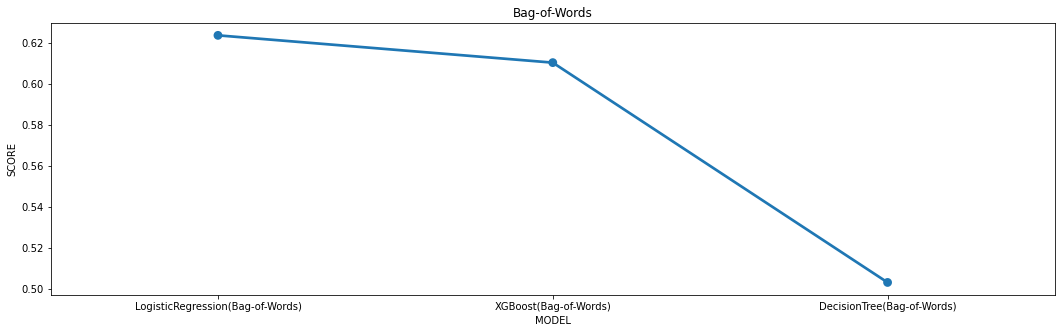

In [109]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [110]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [111]:
score_2 = [log_tfidf,score,dct_score_tfidf]

In [112]:
compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

### F1 score of different models using TF-IDF features

In [113]:
compare_2.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.601269,0.583626,0.489906


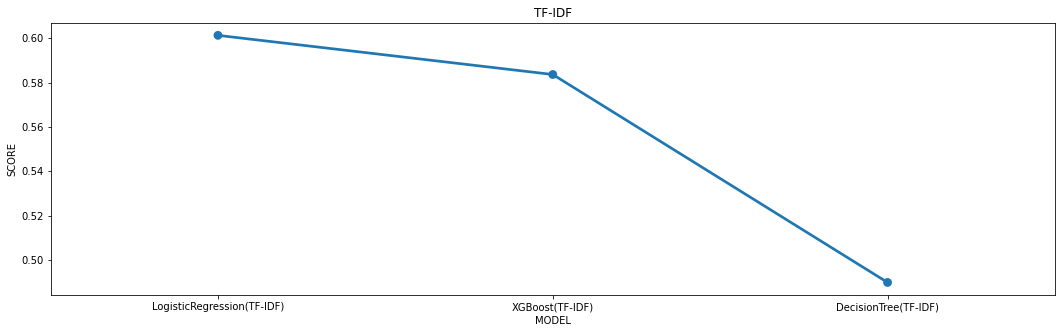

In [114]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [115]:
Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

In [116]:
score_best = [log_bow,log_tfidf]

In [117]:
compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

### Compare logistic regression F1 scores for bag-of-words and TF-IDF features

In [118]:
compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.623679,0.601269


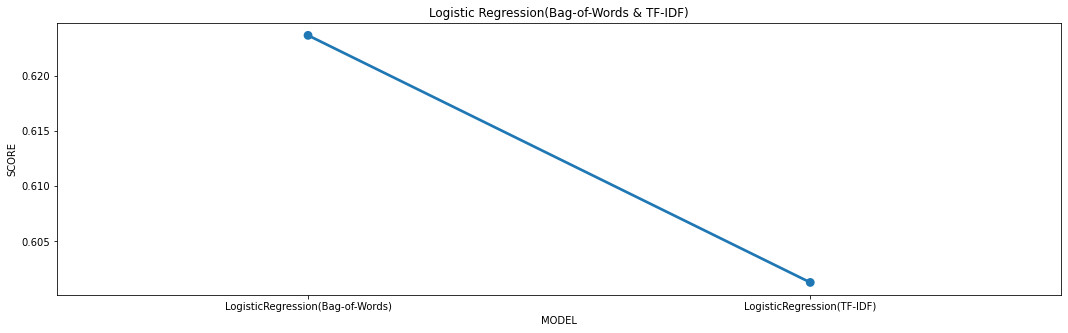

In [119]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

## Part II: Predict results of test data via logisitic regression model using bag-of-words features

In [120]:
test_bow = bow[30000:]

In [121]:
test_pred = Log_Reg.predict_proba(test_bow)

In [122]:
test_pred_int = test_pred[:,1] >= 0.3

In [123]:
test_pred_int = test_pred_int.astype(np.int)

In [124]:
test['label'] = test_pred_int

In [125]:
submission = test[['tweet','label']]

In [126]:
submission.to_csv('result_beyond.csv', index=False)

In [127]:
res = pd.read_csv('result_beyond.csv')
res

,tweet,label
0,@aneelfassa beyond meat burgers are diff,0
1,dennys plant based burgers a close second to b...,0
2,Who ever said Beyond Meat tastes like meat FUC...,1
3,@feebee79 I’ve just had a beyond burger with f...,0
4,@themetdtd Yeah it’s great that all I have to ...,0
...,...,...
9994,@O0Rocker0O they started selling the beyond bu...,0
9995,"Reduce your meat consumption, start by cutting...",1
9996,@mattimolari Tässähän tämä homma kärjistettynä...,0
9997,@niksy @NebojsaG @polojaci @josephbt @borisrad...,0
